In [309]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import DBSCAN

import sys

In [285]:
def euclidean_distance(x1, X):
    return np.linalg.norm(x1 - X, axis=1)


class ImpDBSCAN:
    
    def __init__(self, eps, min_points):
        self.eps = eps
        self.min_samples = min_points
        
    def fit(self, X, dist_measure=euclidean_distance):
        
        distance_matrix = []
        
        for x in X:
            distance_matrix.append(dist_measure(x, X))
            
        distance_matrix = np.array(distance_matrix)
        
        eps_bool_matrix = distance_matrix <= self.eps
        
        self.core_point_inds = np.where(eps_bool_matrix.sum(axis=1) > self.min_samples)[0]
        
        self.border_point_inds = np.where((eps_bool_matrix.sum(axis=1) < self.min_samples) & (eps_bool_matrix.sum(axis=1) != 0))[0]
        
        self.noise_point_inds = np.where(eps_bool_matrix.sum(axis=1) == 0)[0]

        clusters_dict = {}

        for i in range(len(X)):
            for j in range(len(X)):
                if i == j: continue
                if eps_bool_matrix[i][j]:
                    if clusters_dict.get(i) == None:
                        clusters_dict[i] = [j]
                    else:
                        clusters_dict[i].append(j)
        
        for i in self.core_point_inds:
            
            new_list = []
            pop_values = []
            
            for k, lis in clusters_dict.items():
                if i in lis:
                    new_list.extend(lis)
                    pop_values.append(k)
                    
            clusters_dict[pop_values[0]] = list(set(new_list))
            for k in pop_values[1:]:
                clusters_dict.pop(k)

        self.clusters = np.ones(len(X)) * -1
    
        for c, v in zip(range(len(clusters_dict)), clusters_dict.values()):
            for i in v:
                self.clusters[i] = c

In [286]:
X, y = make_moons(n_samples=300, noise=0.1, random_state=0)

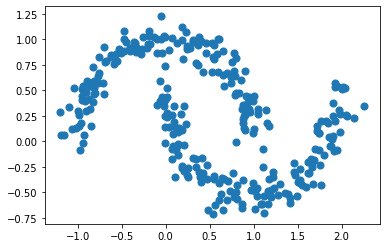

In [287]:
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

In [293]:
imp_dbscan = ImpDBSCAN(eps=0.2, min_points=7)
imp_dbscan.fit(X)

In [294]:
imp_dbscan.clusters

array([0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 2., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 0.

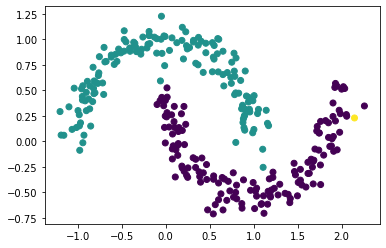

In [295]:
plt.scatter(X[:, 0], X[:, 1], c=imp_dbscan.clusters)
plt.show()

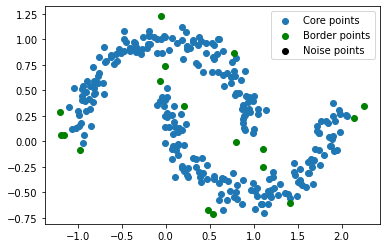

In [310]:
core = imp_dbscan.core_point_inds
border = imp_dbscan.border_point_inds
noise = imp_dbscan.noise_point_inds

plt.scatter(X[core][:, 0], X[core][:, 1])
plt.scatter(X[border][:, 0], X[border][:, 1], color="green")
plt.scatter(X[noise][:, 0], X[noise][:, 1], color="black")
plt.legend(["Core points", "Border points", "Noise points"])
plt.show()

In [308]:
dbscan = DBSCAN(eps=0.2, min_samples=7)
dbscan.fit(X)

DBSCAN(eps=0.2, min_samples=7)

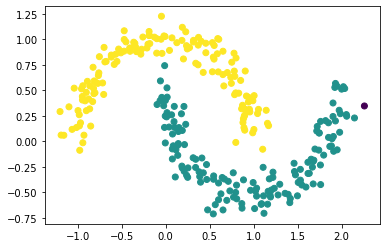

In [266]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.show()

In [205]:
X, y = make_blobs(random_state=2022)

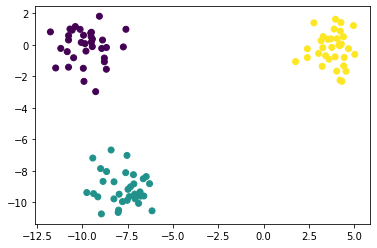

In [206]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [207]:
dbscan = ImpDBSCAN(2, 5)

In [208]:
dbscan.fit(X)

In [209]:
dbscan.clusters

array([0., 1., 2., 2., 1., 1., 2., 2., 0., 2., 1., 0., 0., 2., 1., 1., 0.,
       2., 2., 0., 1., 2., 1., 1., 0., 0., 2., 2., 2., 1., 2., 1., 0., 0.,
       0., 0., 2., 1., 2., 0., 0., 2., 2., 0., 0., 1., 0., 1., 2., 0., 1.,
       2., 1., 1., 1., 1., 2., 0., 0., 0., 2., 0., 2., 2., 2., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 2., 0., 2., 0., 2., 1.,
       2., 2., 2., 2., 2., 0., 0., 1., 1., 2., 1., 0., 1., 0., 2.])

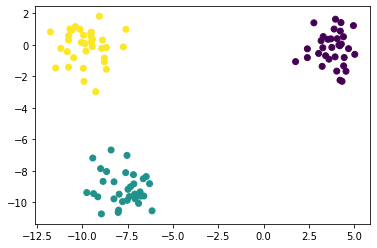

In [210]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.clusters)
plt.show()

In [211]:
X, y = make_circles(500, random_state=2022, noise=0.05, factor=0.3)

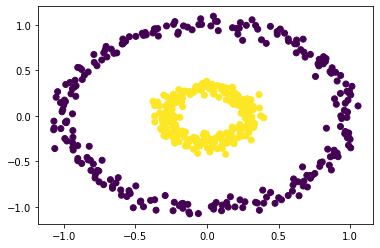

In [212]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [213]:
dbscan = ImpDBSCAN(0.4, 5)
dbscan.fit(X)

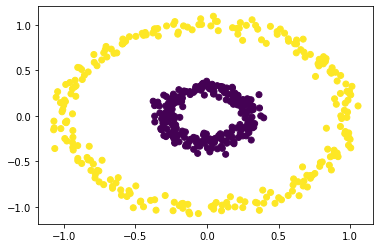

In [214]:
plt.scatter(X[:, 0], X[:, 1], c=dbscan.clusters)
plt.show()